In [6]:
import pandas as pd

In [8]:
medal_count = pd.read_excel("Medals.xlsx")
medal_count 

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


## Estimates of Location


In [9]:
# Mean

medal_count["Total"].mean() 

11.612903225806452

In [11]:
# Weighted Mean
import numpy as np
np.average(medal_count["Gold"], weights=medal_count["Total"])

14.743518518518519

In [12]:
# Trimmed Mean

from scipy.stats import trim_mean

trim_mean(medal_count["Gold"], 0.1)

1.96

In [16]:
# Median

medal_count["Total"].median()

4.0

In [17]:
# Weighted Median
def weighted_median(df, median_col, weighted_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weighted_col].cumsum()
    cutoff = df_sorted[weighted_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count,"Total","Gold")

40

In [18]:
# Percentile
q3 = np.percentile(medal_count["Total"],75)
q3

11.0

In [19]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability (Dispersion Metrics)

In [21]:
# Variance

from statistics import variance

variance(medal_count["Gold"])

49.315100514259

In [22]:
# Standard Deviation

from statistics import stdev

stdev(medal_count["Gold"])

7.022471111671376

In [23]:
# Mean Absolute Deviation

from numpy import mean, absolute

mean(absolute(medal_count["Gold"] - mean(medal_count["Gold"])))


4.0048560527228485

In [24]:
# Median Absolute Deviation from the mean

from numpy import median, absolute

median(absolute(medal_count["Gold"] - median(medal_count["Gold"])))

1.0

In [25]:
# Interquartile Range

q3, q1 = np.percentile(medal_count["Gold"], [75,25])
iqr = q3 - q1
iqr

3.0

## Exploring the Data Distribution



<AxesSubplot:>

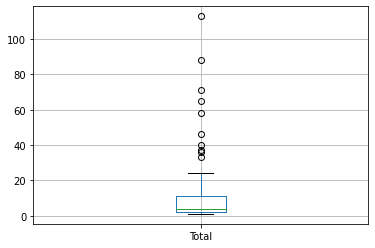

In [28]:
# Box Plot

medal_count.boxplot(column="Total", by=None, ax=None)



In [32]:
# Frequency Table

frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count["Gold"],10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


In [33]:
# Histogram

np.histogram(medal_count["Gold"], bins=10)

(array([72, 11,  4,  0,  1,  2,  1,  0,  0,  2], dtype=int32),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]))

Text(23, 45, '$\\mu=15, b=3$')

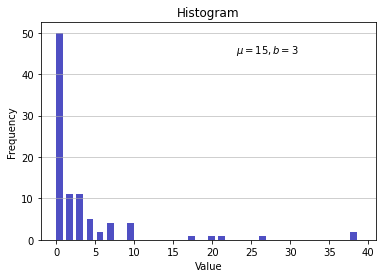

In [43]:
import matplotlib.pyplot as plt
# An "interface" to matplotlib.axes.Axes.hist() method
plt.hist(x=medal_count["Gold"], bins='auto', color='#0504aa', alpha=0.7, width=0.85)
plt.grid(axis='y', alpha =0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.text(23,45, r'$\mu=15, b=3$')


Text(0.5, 0, 'Gold Medals Won')

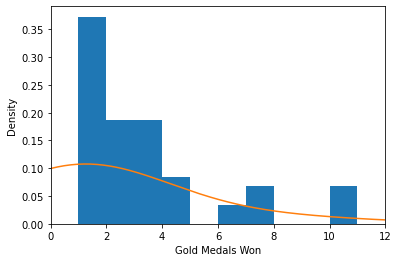

In [45]:
# Density Plot

ax = medal_count["Gold"].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
medal_count["Gold"].plot.density(ax=ax)
ax.set_xlabel('Gold Medals Won')


# Exploring Binary and Categorical Data 

In [48]:
# mode

medal_count["Gold"].mode()

0    0
dtype: int64

Text(0, 0.5, 'Country')

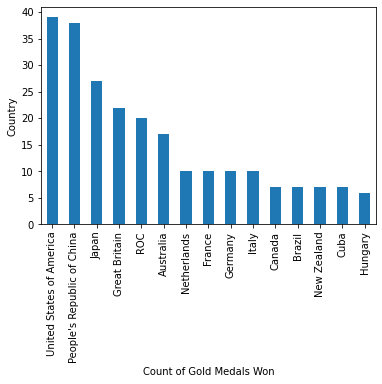

In [56]:
ax = medal_count.iloc[:15,:].plot.bar(x="Team/NOC",y="Gold", legend=False)
ax.set_xlabel('Count of Gold Medals Won')
ax.set_ylabel('Country')

([<matplotlib.patches.Wedge at 0xa0f3208>,
 [Text(-0.7155314051070093, 0.8354728052459811, 'United States of America'),
  Text(-0.9458998161617527, -0.5614922419634689, "People's Republic of China"),
  Text(0.15924203448189886, -1.0884125938512774, 'Japan'),
  Text(0.9458998161617524, -0.5614922419634694, 'Great Britain'),
  Text(1.0717821060885606, 0.247554270955622, 'ROC'),
  Text(0.6847227019531091, 0.8609034913566292, 'Australia'),
  Text(0.19865842661840455, 1.081912579432137, 'Netherlands')],
 [Text(-0.39028985733109595, 0.45571243922508053, '22.5%'),
  Text(-0.5159453542700468, -0.3062684956164376, '22.0%'),
  Text(0.0868592915355812, -0.5936795966461513, '15.6%'),
  Text(0.5159453542700467, -0.30626849561643776, '12.7%'),
  Text(0.5846084215028512, 0.13502960233943015, '11.6%'),
  Text(0.3734851101562413, 0.46958372255816133, '9.8%'),
  Text(0.10835914179185702, 0.590134134235711, '5.8%')])

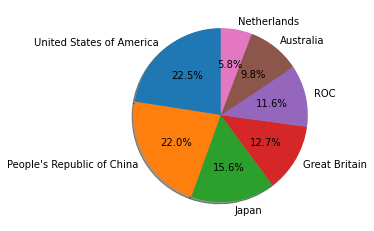

In [64]:
# Pie Chart
pie_data = medal_count.iloc[:7, :]
plt.pie(pie_data["Gold"], labels=pie_data["Team/NOC"], autopct='%1.1f%%', shadow=True,startangle=90)


# Correlation



In [67]:
# Correlation Matrix

medal_count.corr()


,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

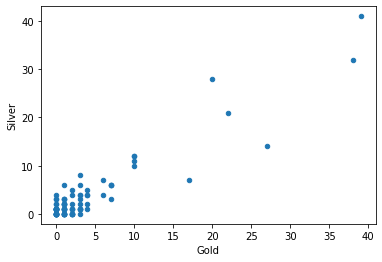

In [68]:
medal_count.plot.scatter(x="Gold",y="Silver")

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

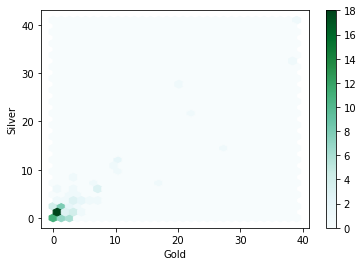

In [70]:
# Hexagonal Binning

medal_count.plot.hexbin(x="Gold",y="Silver",gridsize=30, sharex=False)

C:\Users\ARC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

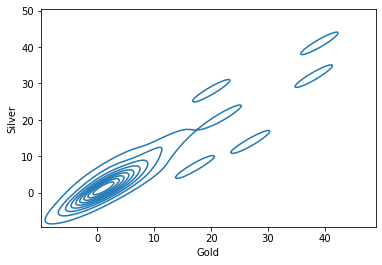

In [71]:
import seaborn as sns

ax = sns.kdeplot(medal_count["Gold"],medal_count["Silver"])
ax

<AxesSubplot:>

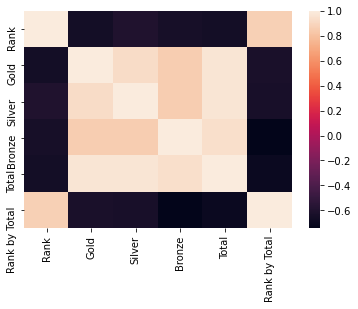

In [73]:
# Heatmap

sns.heatmap(medal_count.corr())

In [84]:
# Contingency Table

crosstab = medal_count[["Silver", "Gold"]].pivot_table(index='Silver', columns='Gold',aggfunc=lambda x: len(x), margins=True)
crosstab.fillna(0, inplace=None)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<AxesSubplot:xlabel='Gold'>

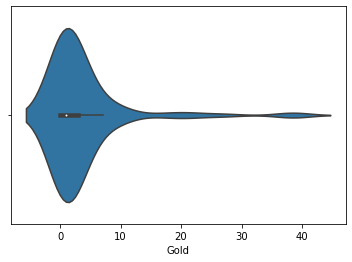

In [85]:
# Violin Plot

sns.violinplot(x=medal_count["Gold"])

<AxesSubplot:>

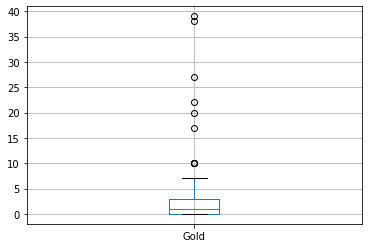

In [88]:
medal_count.boxplot(column="Gold")